## Problem Statement

#### Food & Beverages Spend Prediction in Club Mahindra Resorts
    Club Mahindra (Club M) makes significant revenue from Food and Beverages (F&B) sales in their resorts. The members of Club M are offered a wide variety of items in either buffet or À la carte form. Following are some benefits that the model to predict the spend by a member in their next visit to a resort will bring:

    Predicting the F&B spend of a member in a resort would help in improving the pre-sales during resort booking through web and mobile app
    Targeted campaigns to suit the member taste and preference of F&B
    Providing members in the resort with a customized experience and offers
    Help resort kitchen to plan the inventory and food quantity to be prepared in advance

    Given the information related to resort, club member, reservation etc. the task is to predict average spend per room night on food and beverages for the each reservation in the test set.
    
#### Evaluation Metric
    Submissions are evaluated on 100 * Root Mean Squared Error (RMSE) on the variable amount_spent_per_room_night_scaled

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
from collections import Counter

In [3]:
%matplotlib inline

In [4]:
plt.style.use('ggplot')
sns.set(color_codes= True, palette= 'muted')

pd.options.display.max_columns= 1000
pd.options.display.max_rows= 1000

In [5]:
#Data Reading
train= pd.read_csv('train/train.csv')
test= pd.read_csv('test/test.csv')
sample= pd.read_csv('sample_submission/sample_submission.csv')

In [6]:
train.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


In [7]:
target= train[['reservation_id', 'amount_spent_per_room_night_scaled']]

In [8]:
train.isnull().sum().sort_values(ascending= False)[:5]

state_code_residence                  4764
season_holidayed_code                  114
amount_spent_per_room_night_scaled       0
resort_type_code                         0
booking_date                             0
dtype: int64

In [9]:
test.isnull().sum().sort_values(ascending= False)[:5]

state_code_residence     2260
season_holidayed_code      35
resort_id                   0
resort_region_code          0
booking_date                0
dtype: int64

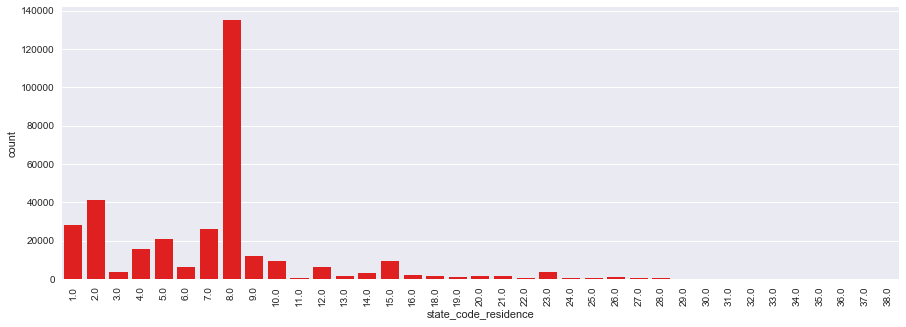

In [10]:
plt.figure(figsize= (15, 5))
sns.countplot(train['state_code_residence'], color= 'red')
plt.xticks(rotation= 90)
plt.show()

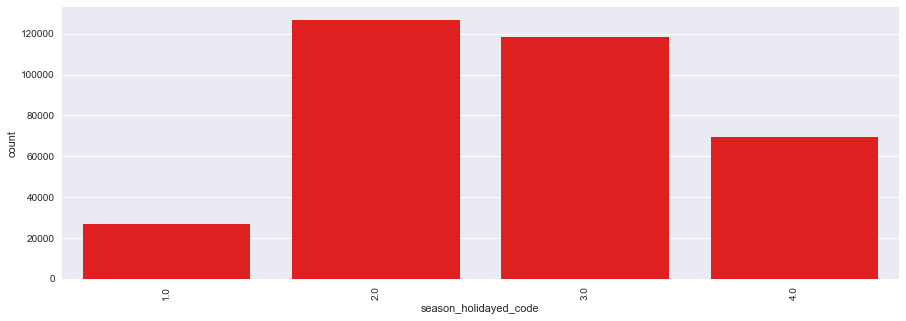

In [11]:
plt.figure(figsize= (15, 5))
sns.countplot(train['season_holidayed_code'], color= 'red')
plt.xticks(rotation= 90)
plt.show()

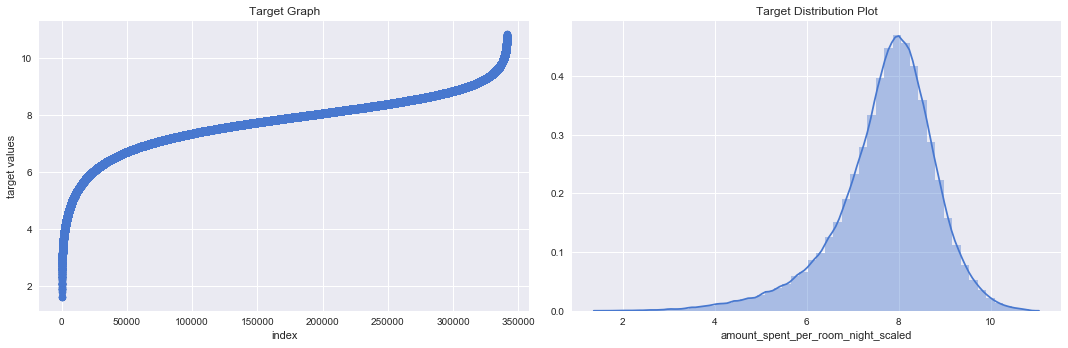

In [12]:
#Now checkout of the outliers using the scatter plot
plt.figure(figsize= (15, 5))
plt.subplot(121)
plt.scatter(train.index, train['amount_spent_per_room_night_scaled'].sort_values(), alpha= 0.8)
plt.xlabel('index')
plt.ylabel('target values')
plt.title('Target Graph')

plt.subplot(122)
sns.distplot(train['amount_spent_per_room_night_scaled'])
plt.title('Target Distribution Plot')

plt.tight_layout()
plt.show()

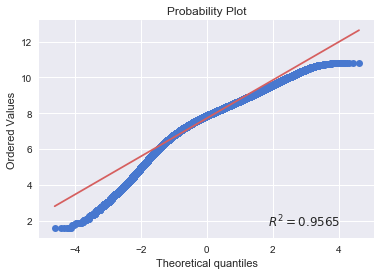

In [13]:
st.probplot(train['amount_spent_per_room_night_scaled'], plot= plt, rvalue= True)
plt.show()

In [14]:
#There is no need to do any kind of transformation of target variable because all are normally distributed

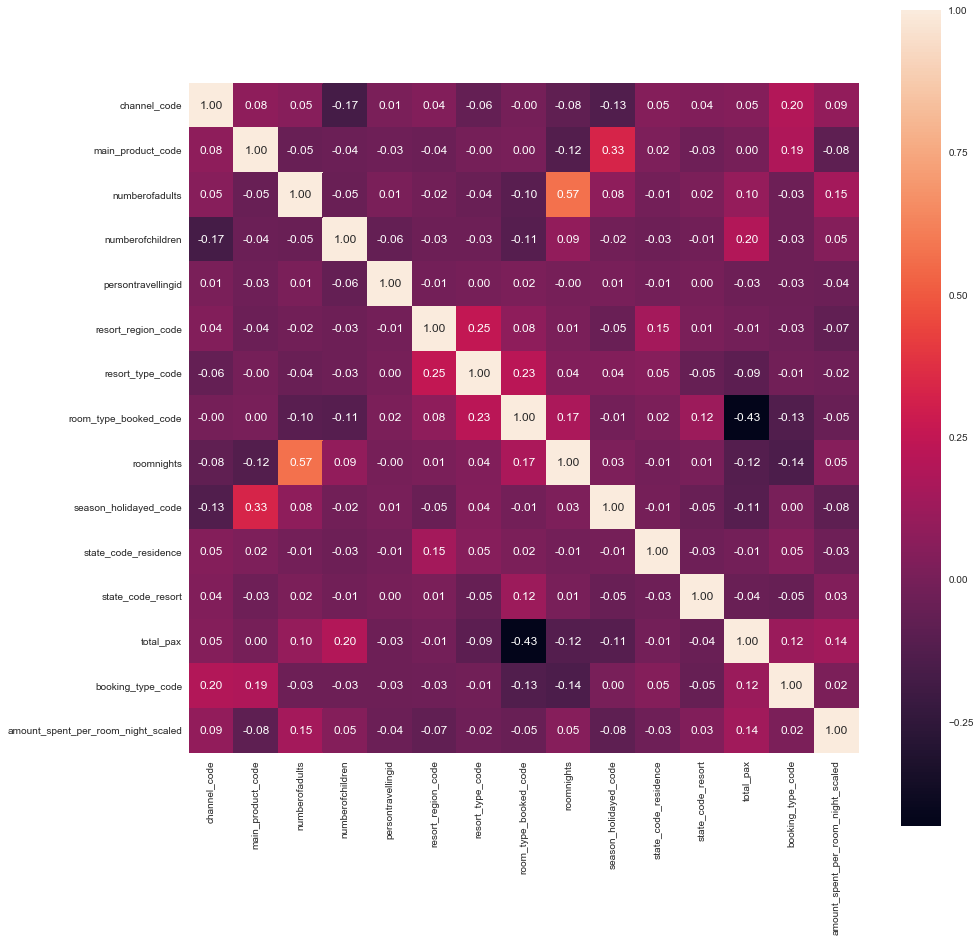

In [15]:
plt.figure(figsize= (15, 15))
sns.heatmap(train.corr(), square= True, annot= True, fmt= '.2f')
plt.show()

In [16]:
#There is very less multicollinearity present there

In [17]:
train.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


In [18]:
memberdf= train.groupby('memberid')['reservation_id'].count().reset_index()

In [19]:
memberdf.columns= ['memberid', 'count_memid']

In [20]:
train= pd.merge(train, memberdf, on= 'memberid')

In [21]:
memberdftest= test.groupby('memberid')['reservation_id'].count().reset_index()

In [22]:
memberdftest.columns= ['memberid', 'count_memid']

In [23]:
test= pd.merge(test, memberdftest, on= 'memberid')

In [24]:
cat_var= [var for var in train.drop(['reservation_id'], axis= 1).columns if train[var].dtypes== 'O']

In [25]:
cat_var.remove('booking_date')
cat_var.remove('checkin_date')
cat_var.remove('checkout_date')

In [26]:
cat_var

['member_age_buckets',
 'memberid',
 'cluster_code',
 'reservationstatusid_code',
 'resort_id']

In [27]:
train.drop(['amount_spent_per_room_night_scaled'], axis= 1, inplace= True)

In [28]:
df= pd.concat([train, test])

In [29]:
df.shape

(488189, 24)

In [30]:
df['booking_date']= pd.to_datetime(df['booking_date'], dayfirst= True)
df['checkin_date']= pd.to_datetime(df['checkin_date'], dayfirst= True)
df['checkout_date']= pd.to_datetime(df['checkout_date'], dayfirst= True)

In [31]:
df['checkin_booking']= (df['checkin_date'] - df['booking_date']).dt.days
df['checkout_booking']= (df['checkout_date'] - df['booking_date']).dt.days
df['checkout_checkin']= (df['checkout_date'] - df['checkin_date']).dt.days

In [32]:
df['booking_year']= df['booking_date'].dt.year
df['booking_month']= df['booking_date'].dt.month
df['booking_day']= df['booking_date'].dt.day
df['booking_dayofweek']= df['booking_date'].dt.dayofweek
df['booking_weekofyear']= df['booking_date'].dt.weekofyear

df['checkin_year']= df['checkin_date'].dt.year
df['checkin_month']= df['checkin_date'].dt.month
df['checkin_day']= df['checkin_date'].dt.day
df['checkin_dayofweek']= df['checkin_date'].dt.dayofweek
df['checkin_weekofyear']= df['checkin_date'].dt.weekofyear

df['checkout_year']= df['checkout_date'].dt.year
df['checkout_month']= df['checkout_date'].dt.month
df['checkout_day']= df['checkout_date'].dt.day
df['checkout_dayofweek']= df['checkout_date'].dt.dayofweek
df['checkout_weekofyear']= df['checkout_date'].dt.weekofyear

In [33]:
df['fm']= df['numberofadults'] + df['numberofchildren']

In [34]:
df.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,count_memid,checkin_booking,checkout_booking,checkout_checkin,booking_year,booking_month,booking_day,booking_dayofweek,booking_weekofyear,checkin_year,checkin_month,checkin_day,checkin_dayofweek,checkin_weekofyear,checkout_year,checkout_month,checkout_day,checkout_dayofweek,checkout_weekofyear,fm
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,2018-04-05,2018-04-05,2018-04-06,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,14,0,1,1,2018,4,5,3,14,2018,4,5,3,14,2018,4,6,4,14,2
1,03930f033646d073462b35d411616323597715ac4fc398...,2015-01-23,2015-04-11,2015-04-16,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,14,78,83,5,2015,1,23,4,4,2015,4,11,5,15,2015,4,16,3,16,2
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,2015-01-28,2015-02-01,2015-02-05,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,14,4,8,4,2015,1,28,2,5,2015,2,1,6,5,2015,2,5,3,6,2
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,2015-05-02,2015-06-11,2015-06-16,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,14,40,45,5,2015,5,2,5,18,2015,6,11,3,24,2015,6,16,1,25,4
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,2015-09-02,2015-12-14,2015-12-19,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,14,103,108,5,2015,9,2,2,36,2015,12,14,0,51,2015,12,19,5,51,2


In [35]:
_train= df[:len(train)]
_test= df[len(train):]

In [36]:
train.shape, _train.shape, test.shape, _test.shape

((341424, 24), (341424, 43), (146765, 24), (146765, 43))

In [37]:
_train['data_type']= 'train'
_test['data_type']= 'test'

In [38]:
df= pd.concat([_train, _test])

In [39]:
df= df.sort_values(by= 'booking_date')

In [40]:
df= df.reset_index(drop= True)

In [41]:
df['prev_checkin_date']= df.groupby('memberid')['checkin_date'].shift(1)
df['prev_booking_date']= df.groupby('memberid')['booking_date'].shift(1)
df['prev_checkout_date']= df.groupby('memberid')['checkout_date'].shift(1)

df['diff_booking_prev']= (df['booking_date'] - df['prev_booking_date']).dt.days
df['diff_checkin_prev']= (df['checkin_date'] - df['prev_checkin_date']).dt.days
df['diff_checkout_prev']= (df['checkout_date'] - df['prev_checkout_date']).dt.days

In [42]:
df['state_code_residence']= df['state_code_residence'].fillna(-999)
df['season_holidayed_code']= df['season_holidayed_code'].fillna(-999)

df['diff_booking_prev']= df['diff_booking_prev'].fillna(0)
df['diff_checkin_prev']= df['diff_checkin_prev'].fillna(0)
df['diff_checkout_prev']= df['diff_checkout_prev'].fillna(0)

In [43]:
df.drop(['prev_checkin_date', 'prev_booking_date', 'prev_checkout_date', 'booking_date', 'checkin_date', 'checkout_date'], axis= 1, inplace= True)

In [44]:
df.head()

,reservation_id,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,count_memid,checkin_booking,checkout_booking,checkout_checkin,booking_year,booking_month,booking_day,booking_dayofweek,booking_weekofyear,checkin_year,checkin_month,checkin_day,checkin_dayofweek,checkin_weekofyear,checkout_year,checkout_month,checkout_day,checkout_dayofweek,checkout_weekofyear,fm,data_type,diff_booking_prev,diff_checkin_prev,diff_checkout_prev
0,ffe26622efe385763cc7a60f8cf5904285e53a3ea0f9fa...,1,2,2,2,45,3,4,2,2,2.0,15.0,5,4,D,1,fb513226e80fece6ad5cdafb84ab494b135a17e62dfad7...,F,A,4ec9599fc203d176a301536c2e091a19bc852759b255bd...,7,120,122,2,2014,9,3,2,36,2015,1,1,3,1,2015,1,3,5,1,4,train,0.0,0.0,0.0
1,c806e7fb0cc7c76d32be7bb0aa5321ee68ff49ba1e0680...,3,1,4,0,45,2,2,2,3,1.0,8.0,2,2,E,1,87b4eed101f9aa54468d0f3ee0123edce8c461b8445157...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,4,120,123,3,2014,9,3,2,36,2015,1,1,3,1,2015,1,4,6,1,4,test,0.0,0.0,0.0
2,31003839432152182b76b94ad187de2de07aa32dc39abc...,1,1,3,0,45,2,1,3,3,1.0,8.0,7,3,E,1,5ef412e739b21b90f27d2ca0f9088fdef0ae9b63be4c5b...,C,A,da4ea2a5506f2693eae190d9360a1f31793c98a1adade5...,8,120,123,3,2014,9,3,2,36,2015,1,1,3,1,2015,1,4,6,1,3,test,0.0,0.0,0.0
3,ac695bbace6e50eb6100371d8e7d39796afc9806c26970...,3,1,4,0,45,3,4,2,5,2.0,5.0,5,3,H,1,fdcefe7128e073090203eef2098f5cb6650a0bf2334ab1...,F,A,4ec9599fc203d176a301536c2e091a19bc852759b255bd...,4,121,126,5,2014,9,3,2,36,2015,1,2,4,1,2015,1,7,2,2,4,train,0.0,0.0,0.0
4,b812c82e48c115a0252fa07c3ec969d54e3aa0e955b550...,3,1,3,0,45,2,2,3,3,1.0,12.0,2,3,D,1,f770a025e60bd18859cd1e3e7dfbdc6a1ffecbde0e83f6...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,3,119,121,2,2014,9,4,3,36,2015,1,1,3,1,2015,1,3,5,1,3,test,0.0,0.0,0.0


In [45]:
_train1= df[df['data_type']== 'train']
_test1= df[df['data_type']== 'test']

In [46]:
_train1.drop(['data_type'], axis= 1, inplace= True)
_test1.drop(['data_type'], axis= 1, inplace= True)

In [47]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, GroupKFold
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

C:\Users\sngupta\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [48]:
_train1['memberid']= LabelEncoder().fit_transform(_train1['memberid'].astype(str))
_test1['memberid']= LabelEncoder().fit_transform(_test1['memberid'].astype(str))

In [49]:
cat_var.remove('memberid')

In [50]:
for col in cat_var:
    encoder= LabelEncoder().fit(_train1[col])
    _train1[col]= encoder.transform(_train1[col].astype(str))
    _test1[col]= encoder.transform(_test1[col].astype(str))

In [51]:
_train1.shape

(341424, 43)

In [52]:
_train1= pd.merge(_train1, target, on= 'reservation_id')

In [54]:
target= _train1['amount_spent_per_room_night_scaled']

In [55]:
sample['reservation_id']= _test1['reservation_id']

In [58]:
_test.shape, sample.shape

((146765, 44), (146765, 2))

In [59]:
X= _train1.drop(['reservation_id', 'amount_spent_per_room_night_scaled'], axis= 1)
test_= _test1.drop(['reservation_id'], axis= 1)

In [61]:
y= target

In [62]:
X.shape, test_.shape, y.shape

((341424, 42), (146765, 42), (341424,))

In [63]:
#Now here, I'm going to use the OLS model to find out the statistical result
model= sm.OLS(y, sm.add_constant(X))
result= model.fit()
print(result.summary())

                                    OLS Regression Results                                    
Dep. Variable:     amount_spent_per_room_night_scaled   R-squared:                       0.129
Model:                                            OLS   Adj. R-squared:                  0.129
Method:                                 Least Squares   F-statistic:                     1265.
Date:                                Sun, 05 May 2019   Prob (F-statistic):               0.00
Time:                                        19:19:07   Log-Likelihood:            -4.9032e+05
No. Observations:                              341424   AIC:                         9.807e+05
Df Residuals:                                  341383   BIC:                         9.812e+05
Df Model:                                          40                                         
Covariance Type:                            nonrobust                                         
                               coef    std err    

In [64]:
import lightgbm as lgbm

In [65]:
def run_LGBM(train, target, test):
    param= {}
    param['learning_rate']= 0.1
    param['objective']= 'regression'
    param['metric']= 'rmse'
    
    X_train, X_test, y_train, y_test= train_test_split(train, target, test_size= 0.25, random_state= 2019)
    
    dtrain= lgbm.Dataset(X_train, y_train)
    dtest= lgbm.Dataset(X_test, y_test)
    
    model= lgbm.train(param, dtrain, num_boost_round= 10000, valid_sets= (dtrain, dtest), valid_names= ('train', 'valid'), 
                      verbose_eval= 100, early_stopping_rounds= 50)
    
    prediction= model.predict(X_test)
    
    print('Checking Metrics...')
    print('r2_squared Error: {:.4f}' .format(r2_score(y_test, prediction)))
    print('MSE: {:.4f}' .format(mean_squared_error(y_test, prediction)))
    print('RMSE: {:.4f}' .format(np.sqrt(mean_squared_error(y_test, prediction))))
    
    print('Plotting Origina vs Predicted Results...')
    
    plt.figure(figsize= (7, 7))
    plt.scatter(y_test, prediction, color= 'blue')
    plt.plot([y_test.min(), y_test.max()], [prediction.min(), prediction.max()], linestyle= '--', color= 'red')
    plt.xlabel('original')
    plt.ylabel('predicted')
    plt.title('RMSE: {:.4f}' .format(np.sqrt(mean_squared_error(y_test, prediction))))
    
    return model.predict(test)

Training until validation scores don't improve for 50 rounds.
[100]	train's rmse: 0.970041	valid's rmse: 0.976067
[200]	train's rmse: 0.958369	valid's rmse: 0.974455
[300]	train's rmse: 0.948895	valid's rmse: 0.974279
[400]	train's rmse: 0.940061	valid's rmse: 0.974177
Early stopping, best iteration is:
[405]	train's rmse: 0.939634	valid's rmse: 0.974121
Checking Metrics...
r2_squared Error: 0.2001
MSE: 0.9489
RMSE: 0.9741
Plotting Origina vs Predicted Results...


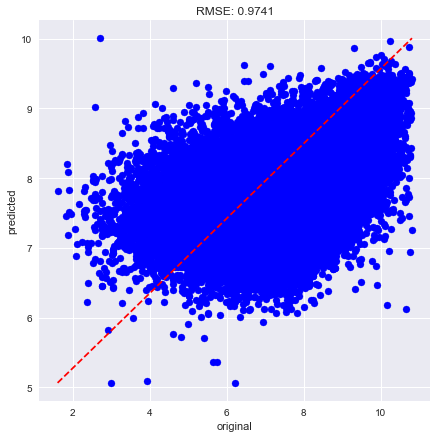

In [66]:
pred_lgbm_1= run_LGBM(X, y, test_)

In [67]:
pred_lgbm_1

array([7.484824  , 7.39325907, 7.9652574 , ..., 7.90122142, 8.07056587,
       7.73620138])

In [68]:
sample= pd.DataFrame({
    'reservation_id': _test1['reservation_id'],
    'amount_spent_per_room_night_scaled': pred_lgbm_1
})

In [70]:
sample.isnull().sum()

amount_spent_per_room_night_scaled    0
reservation_id                        0
dtype: int64

In [71]:
sample.to_csv('sample_5.csv', index= False)

In [72]:
def run_LGBM(X_train, X_test, y_train, y_test):
    param= {}
    param['learning_rate']= 0.1
    param['objective']= 'regression'
    param['metric']= 'rmse'
    param['seed']= 2019
    
    #X_train, X_test, y_train, y_test= train_test_split(train, target, test_size= 0.25, random_state= 2019)
    
    dtrain= lgbm.Dataset(X_train, y_train)
    dtest= lgbm.Dataset(X_test, y_test)
    
    model= lgbm.train(param, dtrain, num_boost_round= 10000, valid_sets= (dtrain, dtest), valid_names= ('train', 'valid'), 
                      verbose_eval= 100, early_stopping_rounds= 50)
    
    prediction= model.predict(X_test)
    
    print('Checking Metrics...')
    print('r2_squared Error: {:.4f}' .format(r2_score(y_test, prediction)))
    print('MSE: {:.4f}' .format(mean_squared_error(y_test, prediction)))
    print('RMSE: {:.4f}' .format(np.sqrt(mean_squared_error(y_test, prediction))))
    
    return model, prediction

In [73]:
from sklearn.model_selection import KFold, GroupKFold

In [74]:
_train_pred= np.zeros(len(train))

In [75]:
_test_pred= 0

In [76]:
fold= GroupKFold(n_splits= 7)

In [78]:
for i, (train_idx, test_idx) in enumerate(fold.split(X, y, groups= train['memberid'])):
    print('FOLD: {}' .format(i+1))
    
    X_train, X_test= X.loc[train_idx], X.loc[test_idx]
    y_train, y_test= y[train_idx], y[test_idx]
    
    _model, _pred= run_LGBM(X_train, X_test, y_train, y_test)
    pred= _model.predict(test_)
    
    _train_pred[test_idx]= _pred
    _test_pred += pred
    
    del _model, _pred, pred

FOLD: 1
Training until validation scores don't improve for 50 rounds.
[100]	train's rmse: 0.969056	valid's rmse: 0.984654
[200]	train's rmse: 0.958298	valid's rmse: 0.982193
[300]	train's rmse: 0.949691	valid's rmse: 0.9816
Early stopping, best iteration is:
[333]	train's rmse: 0.94708	valid's rmse: 0.981485
Checking Metrics...
r2_squared Error: 0.2070
MSE: 0.9633
RMSE: 0.9815
FOLD: 2
Training until validation scores don't improve for 50 rounds.
[100]	train's rmse: 0.970303	valid's rmse: 0.973893
[200]	train's rmse: 0.95926	valid's rmse: 0.972397
Early stopping, best iteration is:
[224]	train's rmse: 0.957145	valid's rmse: 0.972194
Checking Metrics...
r2_squared Error: 0.1968
MSE: 0.9452
RMSE: 0.9722
FOLD: 3
Training until validation scores don't improve for 50 rounds.
[100]	train's rmse: 0.969295	valid's rmse: 0.981111
[200]	train's rmse: 0.95839	valid's rmse: 0.979422
[300]	train's rmse: 0.949581	valid's rmse: 0.979097
[400]	train's rmse: 0.941734	valid's rmse: 0.978869
Early stoppin

In [79]:
r2_score(target, _train_pred)

0.1983692072314076

In [80]:
np.sqrt(mean_squared_error(target, _train_pred))

0.9760151032819357

In [81]:
_test_pred= _test_pred/7

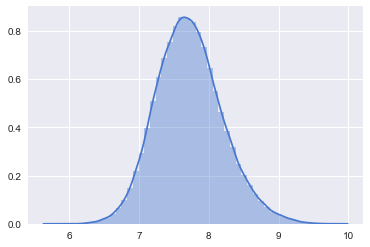

In [82]:
sns.distplot(_test_pred)
plt.show()

In [83]:
sample['amount_spent_per_room_night_scaled']= _test_pred

In [84]:
sample.to_csv('sample_6.csv', index= False)

In [89]:
def run_LGBM(X_train, X_test, y_train, y_test):
    param= {}
    param['learning_rate']= 0.01
    param['objective']= 'regression'
    param['metric']= 'rmse'
    #param['boosting']= 'dart'
    param['num_leaves']= 51
    #param['tree_learner']= 'voting'
    param['num_threads']= 7
    param['max_depth']= 6
    param['bagging_fraction']= 0.65
    param['feature_fraction']= 0.5
    param['seed']= 2019
    
    #X_train, X_test, y_train, y_test= train_test_split(train, target, test_size= 0.25, random_state= 2019)
    
    dtrain= lgbm.Dataset(X_train, y_train)
    dtest= lgbm.Dataset(X_test, y_test)
    
    model= lgbm.train(param, dtrain, num_boost_round= 10000, valid_sets= (dtrain, dtest), valid_names= ('train', 'valid'), 
                      verbose_eval= 100, early_stopping_rounds= 50)
    
    prediction= model.predict(X_test)
    
    print('Checking Metrics...')
    print('r2_squared Error: {:.4f}' .format(r2_score(y_test, prediction)))
    print('MSE: {:.4f}' .format(mean_squared_error(y_test, prediction)))
    print('RMSE: {:.4f}' .format(np.sqrt(mean_squared_error(y_test, prediction))))
    
    return model, prediction

In [90]:
_train_pred= np.zeros(len(train))
_test_pred= 0

In [91]:
fold= GroupKFold(n_splits= 10)

In [92]:
for i, (train_idx, test_idx) in enumerate(fold.split(X, y, groups= train['memberid'])):
    print('FOLD: {}' .format(i+1))
    
    X_train, X_test= X.loc[train_idx], X.loc[test_idx]
    y_train, y_test= y[train_idx], y[test_idx]
    
    _model, _pred= run_LGBM(X_train, X_test, y_train, y_test)
    pred= _model.predict(test_)
    
    _train_pred[test_idx]= _pred
    _test_pred += pred
    
    del _model, _pred, pred

FOLD: 1
Training until validation scores don't improve for 50 rounds.
[100]	train's rmse: 1.02927	valid's rmse: 1.02489
[200]	train's rmse: 1.00622	valid's rmse: 1.00159
[300]	train's rmse: 0.993221	valid's rmse: 0.988518
[400]	train's rmse: 0.985977	valid's rmse: 0.981791
[500]	train's rmse: 0.980984	valid's rmse: 0.977469
[600]	train's rmse: 0.97728	valid's rmse: 0.974581
[700]	train's rmse: 0.974388	valid's rmse: 0.972586
[800]	train's rmse: 0.97203	valid's rmse: 0.971185
[900]	train's rmse: 0.970009	valid's rmse: 0.97016
[1000]	train's rmse: 0.96824	valid's rmse: 0.969337
[1100]	train's rmse: 0.966682	valid's rmse: 0.968799
[1200]	train's rmse: 0.965205	valid's rmse: 0.968272
[1300]	train's rmse: 0.963876	valid's rmse: 0.967857
[1400]	train's rmse: 0.962582	valid's rmse: 0.967512
[1500]	train's rmse: 0.961371	valid's rmse: 0.967226
[1600]	train's rmse: 0.960204	valid's rmse: 0.966959
[1700]	train's rmse: 0.959103	valid's rmse: 0.966698
[1800]	train's rmse: 0.958061	valid's rmse: 0.

In [93]:
r2_score(target, _train_pred)

0.2014812225566398

In [94]:
np.sqrt(mean_squared_error(target, _train_pred))

0.9741187642353902

In [95]:
_test_pred= _test_pred/10

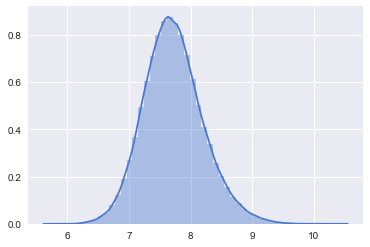

In [96]:
sns.distplot(_test_pred)
plt.show()

In [97]:
sample['amount_spent_per_room_night_scaled']= _test_pred

In [98]:
sample.to_csv('sample_7.csv', index= False)

In [99]:
import xgboost as xgb

In [100]:
def run_LGBM(X_train, X_test, y_train, y_test):
    param= {}
    param['learning_rate']= 0.01
    param['objective']= 'regression'
    param['metric']= 'rmse'
    #param['boosting']= 'dart'
    param['num_leaves']= 51
    #param['tree_learner']= 'voting'
    param['num_threads']= 7
    #param['max_depth']= 6
    param['bagging_fraction']= 0.65
    param['feature_fraction']= 0.5
    param['seed']= 2019
    
    #X_train, X_test, y_train, y_test= train_test_split(train, target, test_size= 0.25, random_state= 2019)
    
    dtrain= lgbm.Dataset(X_train, y_train)
    dtest= lgbm.Dataset(X_test, y_test)
    
    model= lgbm.train(param, dtrain, num_boost_round= 10000, valid_sets= (dtrain, dtest), valid_names= ('train', 'valid'), 
                      verbose_eval= 100, early_stopping_rounds= 50)
    
    prediction= model.predict(X_test)
    
    print('Checking Metrics...')
    print('r2_squared Error: {:.4f}' .format(r2_score(y_test, prediction)))
    print('MSE: {:.4f}' .format(mean_squared_error(y_test, prediction)))
    print('RMSE: {:.4f}' .format(np.sqrt(mean_squared_error(y_test, prediction))))
    
    return model, prediction

In [101]:
_train_pred= np.zeros(len(train))
_test_pred= 0

In [102]:
fold= GroupKFold(n_splits= 5)

In [103]:
for i, (train_idx, test_idx) in enumerate(fold.split(X, y, groups= train['memberid'])):
    print('FOLD: {}' .format(i+1))
    
    X_train, X_test= X.loc[train_idx], X.loc[test_idx]
    y_train, y_test= y[train_idx], y[test_idx]
    
    _model, _pred= run_LGBM(X_train, X_test, y_train, y_test)
    pred= _model.predict(test_)
    
    _train_pred[test_idx]= _pred
    _test_pred += pred
    
    del _model, _pred, pred

FOLD: 1
Training until validation scores don't improve for 50 rounds.
[100]	train's rmse: 1.02787	valid's rmse: 1.02211
[200]	train's rmse: 1.00425	valid's rmse: 0.99979
[300]	train's rmse: 0.990946	valid's rmse: 0.987561
[400]	train's rmse: 0.983591	valid's rmse: 0.981423
[500]	train's rmse: 0.978667	valid's rmse: 0.977782
[600]	train's rmse: 0.974825	valid's rmse: 0.975377
[700]	train's rmse: 0.971765	valid's rmse: 0.973859
[800]	train's rmse: 0.969118	valid's rmse: 0.972722
[900]	train's rmse: 0.966726	valid's rmse: 0.971934
[1000]	train's rmse: 0.964556	valid's rmse: 0.97136
[1100]	train's rmse: 0.962578	valid's rmse: 0.970987
[1200]	train's rmse: 0.960687	valid's rmse: 0.970695
[1300]	train's rmse: 0.958955	valid's rmse: 0.970458
[1400]	train's rmse: 0.957283	valid's rmse: 0.970286
[1500]	train's rmse: 0.955659	valid's rmse: 0.970082
[1600]	train's rmse: 0.954102	valid's rmse: 0.969929
[1700]	train's rmse: 0.9526	valid's rmse: 0.969823
[1800]	train's rmse: 0.951145	valid's rmse: 0

In [104]:
r2_score(target, _train_pred)

0.20091753749916041

In [105]:
np.sqrt(mean_squared_error(target, _train_pred))

0.9744625252950696

In [107]:
_test_pred= _test_pred/5

In [109]:
sample['amount_spent_per_room_night_scaled']= _test_pred

In [110]:
sample.to_csv('sample_8.csv', index= False)

In [123]:
def run_XGB(X_train, X_test, y_train, y_test):
    param= {}
    param['eda']= 0.03
    #param['objective']= 'reg:squarederror'
    param['metric']= 'rmse'
    #param['boosting']= 'dart'
    param['max_leaves']= 51
    #param['tree_learner']= 'voting'
    param['nthread']= 7
    param['max_depth']= 8
    #param['bagging_fraction']= 0.65
    #param['feature_fraction']= 0.5
    param['seed']= 2019
    param['subsample']= 0.5
    param['colsample_bytree']= 0.65
    param['feature_selector']= 'greedy'
    
    #X_train, X_test, y_train, y_test= train_test_split(train, target, test_size= 0.25, random_state= 2019)
    
    dtrain= xgb.DMatrix(X_train, y_train)
    dtest= xgb.DMatrix(X_test, y_test)
    
    watchlist= [(dtrain, 'train'), (dtest, 'valid')]
    
    model= xgb.train(param, dtrain, num_boost_round= 5000, evals= watchlist,
                      verbose_eval= 100, early_stopping_rounds= 50)
    
    prediction= model.predict(dtest)
    
    print('Checking Metrics...')
    print('r2_squared Error: {:.4f}' .format(r2_score(y_test, prediction)))
    print('MSE: {:.4f}' .format(mean_squared_error(y_test, prediction)))
    print('RMSE: {:.4f}' .format(np.sqrt(mean_squared_error(y_test, prediction))))
    
    return model, prediction

In [124]:
_train_pred= np.zeros(len(train))
_test_pred= 0

In [125]:
fold= GroupKFold(n_splits= 5)

In [126]:
for i, (train_idx, test_idx) in enumerate(fold.split(X, y, groups= train['memberid'])):
    print('FOLD: {}' .format(i+1))
    
    X_train, X_test= X.loc[train_idx], X.loc[test_idx]
    y_train, y_test= y[train_idx], y[test_idx]
    
    _model, _pred= run_XGB(X_train, X_test, y_train, y_test)
    dtest_= xgb.DMatrix(test_)
    pred= _model.predict(dtest_)
    
    _train_pred[test_idx]= _pred
    _test_pred += pred
    
    del _model, _pred, pred

FOLD: 1
[0]	train-rmse:5.16512	valid-rmse:5.16217
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
Stopping. Best iteration:
[25]	train-rmse:0.954154	valid-rmse:0.983724

Checking Metrics...
r2_squared Error: 0.1613
MSE: 0.9859
RMSE: 0.9929
FOLD: 2
[0]	train-rmse:5.16329	valid-rmse:5.16252
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
Stopping. Best iteration:
[21]	train-rmse:0.953971	valid-rmse:0.999791

Checking Metrics...
r2_squared Error: 0.1582
MSE: 1.0159
RMSE: 1.0079
FOLD: 3
[0]	train-rmse:5.16314	valid-rmse:5.16817
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
Stopping. Best iteration:
[26]	train-rmse:0.95221	valid-rmse:0.984424

Checking Metrics...
r2_squared Error: 0.1664
MSE: 0.9849
RMS

In [127]:
r2_score(target, _train_pred)

0.16320935981159734

In [128]:
np.sqrt(mean_squared_error(target, _train_pred))

0.997189620655771

In [129]:
_test_pred= _test_pred/5

In [130]:
_test_pred

array([7.4368453, 7.151333 , 7.629701 , ..., 7.9912405, 8.152418 ,
       7.9562674], dtype=float32)

In [131]:
sample['amount_spent_per_room_night_scaled']= _test_pred

In [132]:
sample.to_csv('sample_9.csv', index= False)

In [133]:
def run_XGB(X_train, X_test, y_train, y_test):
    param= {}
    param['eda']= 0.01
    #param['objective']= 'reg:squarederror'
    param['metric']= 'rmse'
    #param['boosting']= 'dart'
    #param['max_leaves']= 51
    #param['tree_learner']= 'voting'
    param['nthread']= 7
    param['max_depth']= 8
    #param['bagging_fraction']= 0.65
    #param['feature_fraction']= 0.5
    param['seed']= 2019
    #param['subsample']= 0.5
    #param['colsample_bytree']= 0.65
    #param['feature_selector']= 'greedy'
    
    #X_train, X_test, y_train, y_test= train_test_split(train, target, test_size= 0.25, random_state= 2019)
    
    dtrain= xgb.DMatrix(X_train, y_train)
    dtest= xgb.DMatrix(X_test, y_test)
    
    watchlist= [(dtrain, 'train'), (dtest, 'valid')]
    
    model= xgb.train(param, dtrain, num_boost_round= 5000, evals= watchlist,
                      verbose_eval= 100, early_stopping_rounds= 50)
    
    prediction= model.predict(dtest)
    
    print('Checking Metrics...')
    print('r2_squared Error: {:.4f}' .format(r2_score(y_test, prediction)))
    print('MSE: {:.4f}' .format(mean_squared_error(y_test, prediction)))
    print('RMSE: {:.4f}' .format(np.sqrt(mean_squared_error(y_test, prediction))))
    
    return model, prediction

In [134]:
_train_pred= np.zeros(len(train))
_test_pred= 0

In [135]:
fold= GroupKFold(n_splits= 7)

In [136]:
for i, (train_idx, test_idx) in enumerate(fold.split(X, y, groups= train['memberid'])):
    print('FOLD: {}' .format(i+1))
    
    X_train, X_test= X.loc[train_idx], X.loc[test_idx]
    y_train, y_test= y[train_idx], y[test_idx]
    
    _model, _pred= run_XGB(X_train, X_test, y_train, y_test)
    dtest_= xgb.DMatrix(test_)
    pred= _model.predict(dtest_)
    
    _train_pred[test_idx]= _pred
    _test_pred += pred
    
    del _model, _pred, pred

FOLD: 1
[0]	train-rmse:5.16295	valid-rmse:5.16445
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
Stopping. Best iteration:
[33]	train-rmse:0.932552	valid-rmse:0.987542

Checking Metrics...
r2_squared Error: 0.1922
MSE: 0.9813
RMSE: 0.9906
FOLD: 2
[0]	train-rmse:5.1619	valid-rmse:5.17379
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
Stopping. Best iteration:
[24]	train-rmse:0.94293	valid-rmse:0.979574

Checking Metrics...
r2_squared Error: 0.1791
MSE: 0.9661
RMSE: 0.9829
FOLD: 3
[0]	train-rmse:5.16395	valid-rmse:5.15561
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
Stopping. Best iteration:
[22]	train-rmse:0.946334	valid-rmse:0.985621

Checking Metrics...
r2_squared Error: 0.1831
MSE: 0.9780
RMSE

In [137]:
r2_score(target, _train_pred)

0.18140552933172638

In [138]:
np.sqrt(mean_squared_error(target, _train_pred))

0.9862879927116688

In [139]:
_test_pred= _test_pred/7

In [140]:
_test_pred

array([7.382382 , 7.212151 , 7.8307695, ..., 7.895513 , 7.957684 ,
       7.902817 ], dtype=float32)

In [141]:
sample['amount_spent_per_room_night_scaled']= _test_pred

In [142]:
sample.to_csv('sample_10.csv', index= False)

In [143]:
def run_LGBM(X_train, X_test, y_train, y_test):
    param= {}
    param['learning_rate']= 0.03
    param['objective']= 'regression'
    param['metric']= 'rmse'
    #param['boosting']= 'dart'
    param['num_leaves']= 51
    #param['tree_learner']= 'voting'
    param['num_threads']= 7
    #param['max_depth']= 6
    param['bagging_fraction']= 0.75
    param['feature_fraction']= 0.65
    param['seed']= 2019
    
    #X_train, X_test, y_train, y_test= train_test_split(train, target, test_size= 0.25, random_state= 2019)
    
    dtrain= lgbm.Dataset(X_train, y_train)
    dtest= lgbm.Dataset(X_test, y_test)
    
    model= lgbm.train(param, dtrain, num_boost_round= 10000, valid_sets= (dtrain, dtest), valid_names= ('train', 'valid'), 
                      verbose_eval= 100, early_stopping_rounds= 50)
    
    prediction= model.predict(X_test)
    
    print('Checking Metrics...')
    print('r2_squared Error: {:.4f}' .format(r2_score(y_test, prediction)))
    print('MSE: {:.4f}' .format(mean_squared_error(y_test, prediction)))
    print('RMSE: {:.4f}' .format(np.sqrt(mean_squared_error(y_test, prediction))))
    
    return model, prediction

In [144]:
_train_pred= np.zeros(len(train))
_test_pred= 0

In [145]:
fold= GroupKFold(n_splits= 7)

In [146]:
for i, (train_idx, test_idx) in enumerate(fold.split(X, y, groups= train['resort_id'])):
    print('FOLD: {}' .format(i+1))
    
    X_train, X_test= X.loc[train_idx], X.loc[test_idx]
    y_train, y_test= y[train_idx], y[test_idx]
    
    _model, _pred= run_LGBM(X_train, X_test, y_train, y_test)
    pred= _model.predict(test_)
    
    _train_pred[test_idx]= _pred
    _test_pred += pred
    
    del _model, _pred, pred

FOLD: 1
Training until validation scores don't improve for 50 rounds.
[100]	train's rmse: 0.986401	valid's rmse: 0.993188
[200]	train's rmse: 0.971726	valid's rmse: 0.982972
[300]	train's rmse: 0.964047	valid's rmse: 0.980359
[400]	train's rmse: 0.95827	valid's rmse: 0.979463
[500]	train's rmse: 0.953449	valid's rmse: 0.979137
[600]	train's rmse: 0.949079	valid's rmse: 0.978863
[700]	train's rmse: 0.944974	valid's rmse: 0.978726
Early stopping, best iteration is:
[749]	train's rmse: 0.943116	valid's rmse: 0.978642
Checking Metrics...
r2_squared Error: 0.2014
MSE: 0.9577
RMSE: 0.9786
FOLD: 2
Training until validation scores don't improve for 50 rounds.
[100]	train's rmse: 0.987172	valid's rmse: 0.991188
[200]	train's rmse: 0.972529	valid's rmse: 0.980054
[300]	train's rmse: 0.964924	valid's rmse: 0.976873
[400]	train's rmse: 0.959184	valid's rmse: 0.97593
[500]	train's rmse: 0.954365	valid's rmse: 0.975273
[600]	train's rmse: 0.950104	valid's rmse: 0.974971
[700]	train's rmse: 0.946005	

In [147]:
np.sqrt(mean_squared_error(target, _train_pred))

0.9746516376267129

In [148]:
_test_pred= _test_pred/7

In [149]:
sample['amount_spent_per_room_night_scaled']= _test_pred

In [150]:
sample.to_csv('sample_11.csv', index= False)

In [151]:
_train_pred= np.zeros(len(train))
_test_pred= 0

In [152]:
from sklearn.ensemble import BaggingRegressor

In [155]:
for i, (train_idx, test_idx) in enumerate(fold.split(X, y, groups= train['memberid'])):
    print('FOLD: {}' .format(i+1))
    
    X_train, X_test= X.loc[train_idx], X.loc[test_idx]
    y_train, y_test= y[train_idx], y[test_idx]
    
    reg_lgbm= lgbm.LGBMRegressor(learning_rate= 0.1, num_leaves= 51, subsample= 0.5, colsample_bytree= 0.65, n_jobs= 4, 
                                 random_state= 2019)
    model= BaggingRegressor(base_estimator= reg_lgbm, random_state= 2019)
    model.fit(X_train, y_train)
    
    _pred= model.predict(X_test)
    
    pred= model.predict(test_)
    
    _train_pred[test_idx]= _pred
    _test_pred += pred
    
    del model, _pred, pred

FOLD: 1
FOLD: 2
FOLD: 3
FOLD: 4
FOLD: 5
FOLD: 6
FOLD: 7


In [156]:
r2_score(target, _train_pred)

0.19520683116497795

In [157]:
np.sqrt(mean_squared_error(target, _train_pred))

0.9779383632094435

In [158]:
sample['amount_spent_per_room_night_scaled']= _test_pred/7

In [159]:
sample.to_csv('sample_12.csv', index= False)

In [163]:
def run_LGBM(X_train, X_test, y_train, y_test):
    param= {}
    param['learning_rate']= 0.01
    param['objective']= 'regression'
    param['metric']= 'rmse'
    #param['boosting']= 'dart'
    #param['num_leaves']= 51
    #param['tree_learner']= 'voting'
    param['num_threads']= 7
    #param['max_depth']= 6
    #param['bagging_fraction']= 0.75
    #param['feature_fraction']= 0.65
    param['seed']= 2019
    
    #X_train, X_test, y_train, y_test= train_test_split(train, target, test_size= 0.25, random_state= 2019)
    
    dtrain= lgbm.Dataset(X_train, y_train)
    dtest= lgbm.Dataset(X_test, y_test)
    
    model= lgbm.train(param, dtrain, num_boost_round= 10000, valid_sets= (dtrain, dtest), valid_names= ('train', 'valid'), 
                      verbose_eval= 100, early_stopping_rounds= 50)
    
    prediction= model.predict(X_test)
    
    print('Checking Metrics...')
    print('r2_squared Error: {:.4f}' .format(r2_score(y_test, prediction)))
    print('MSE: {:.4f}' .format(mean_squared_error(y_test, prediction)))
    print('RMSE: {:.4f}' .format(np.sqrt(mean_squared_error(y_test, prediction))))
    
    return model, prediction

In [164]:
_train_pred= np.zeros(len(train))
_test_pred= 0

In [165]:
fold= GroupKFold(n_splits= 7)

In [166]:
for i, (train_idx, test_idx) in enumerate(fold.split(X, y, groups= train['resort_id'])):
    print('FOLD: {}' .format(i+1))
    
    X_train, X_test= X.loc[train_idx], X.loc[test_idx]
    y_train, y_test= y[train_idx], y[test_idx]
    
    _model, _pred= run_LGBM(X_train, X_test, y_train, y_test)
    pred= _model.predict(test_)
    
    _train_pred[test_idx]= _pred
    _test_pred += pred
    
    del _model, _pred, pred

FOLD: 1
Training until validation scores don't improve for 50 rounds.
[100]	train's rmse: 1.02219	valid's rmse: 1.02654
[200]	train's rmse: 1.00121	valid's rmse: 1.00568
[300]	train's rmse: 0.990548	valid's rmse: 0.995761
[400]	train's rmse: 0.984233	valid's rmse: 0.990374
[500]	train's rmse: 0.980025	valid's rmse: 0.98713
[600]	train's rmse: 0.976951	valid's rmse: 0.985018
[700]	train's rmse: 0.974498	valid's rmse: 0.983548
[800]	train's rmse: 0.972442	valid's rmse: 0.982427
[900]	train's rmse: 0.970709	valid's rmse: 0.981687
[1000]	train's rmse: 0.969159	valid's rmse: 0.981257
[1100]	train's rmse: 0.967739	valid's rmse: 0.980956
[1200]	train's rmse: 0.966451	valid's rmse: 0.98072
[1300]	train's rmse: 0.965247	valid's rmse: 0.980503
[1400]	train's rmse: 0.964109	valid's rmse: 0.980338
[1500]	train's rmse: 0.963028	valid's rmse: 0.980171
[1600]	train's rmse: 0.961988	valid's rmse: 0.980082
[1700]	train's rmse: 0.961011	valid's rmse: 0.98
[1800]	train's rmse: 0.960045	valid's rmse: 0.97

In [167]:
sample['amount_spent_per_room_night_scaled']= _test_pred/7
sample.to_csv('sample_13.csv', index= False)